In [4]:
#Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
#Importing Dataset
from sklearn.datasets import load_boston

boston=load_boston()

boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
#creating dataframe

origional_df=pd.DataFrame(boston.data,columns=boston.feature_names)
origional_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#Adding target column

origional_df['PRICE']=boston.target
origional_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#Number of samples and features(including label)

origional_df.shape

(506, 14)

In [10]:
#Number of NULL values

origional_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
#Datatype of feature

origional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


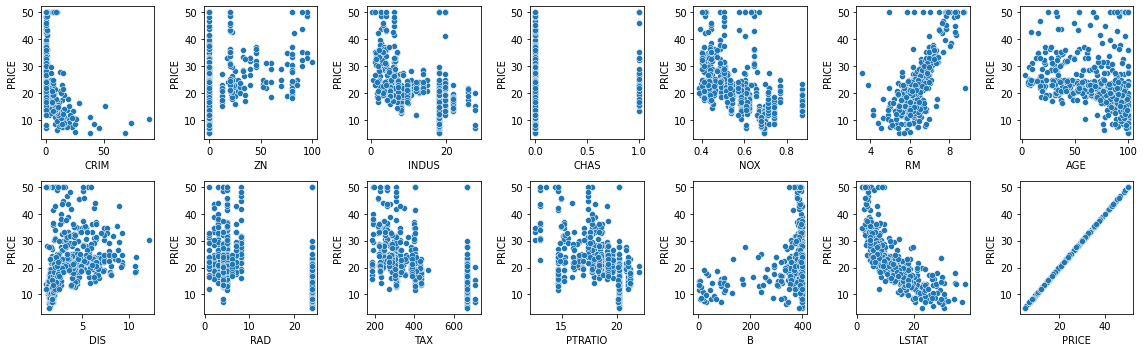

In [12]:
#visualizing relationship between features and response

fig,axs=plt.subplots(2,7,figsize=(16,5))

row=2
col=7
cols=list(origional_df.columns)
index=0
for i in range(row):
    for j in range(col):
        sns.scatterplot(x=cols[index],y='PRICE',data=origional_df,ax=axs[i][j])
        index+=1
        
plt.tight_layout()
plt.show()

In [13]:
#Checking for normalization

origional_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


If the model has calculated a 95% confidence for our model coefficients, it can be interpreted as follows: 
If the population from which this sample is drawn, is **sampled 100 times**, then approximately **95 (out of 100) of those confidence intervals** shall contain the "true" coefficients.

In [14]:
import statsmodels.formula.api as smf

lm=smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + PRICE',data=origional_df).fit()
lm.conf_int()

C:\Users\HP-PC\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1
Intercept,-2.612096e-14,9.006981e-14
CRIM,-7.385961e-16,-1.861070e-17
ZN,-9.068004e-16,-6.058784e-16
INDUS,-8.468167e-16,4.859942e-16
CHAS,-1.431234e-14,4.542378e-15
NOX,-6.527020e-14,1.930697e-14
RM,-1.011396e-14,-3.221340e-16
AGE,-1.847669e-16,1.015002e-16
DIS,-2.500251e-15,2.056161e-15
RAD,-1.157543e-15,3.109983e-16


The conventional hypothesis test is as follows:
- **Null hypothesis:** No relationship exists between features and label
- **Alternative hypothesis:** There exists a relationship between feature and label

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. 

In [15]:
lm.pvalues

Intercept    2.800560e-01
CRIM         3.931617e-02
ZN           4.177282e-21
INDUS        5.950231e-01
CHAS         3.091292e-01
NOX          2.861494e-01
RM           3.676459e-02
AGE          5.679189e-01
DIS          8.482136e-01
RAD          2.579272e-01
TAX          6.052659e-01
PTRATIO      4.431109e-01
B            1.347018e-05
LSTAT        2.518617e-04
PRICE        0.000000e+00
dtype: float64

In [16]:
lm.rsquared

1.0

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.455e+30
Date:                Mon, 22 Feb 2021   Prob (F-statistic):               0.00
Time:                        13:03:22   Log-Likelihood:                 15114.
No. Observations:                 506   AIC:                        -3.020e+04
Df Residuals:                     491   BIC:                        -3.014e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.197e-14   2.96e-14      1.081      0.280   -2.61e-14    9.01e-14
CRIM       -3.786e-16   1.83e-16     -2.066      0.039   -7.39e-16   -1.86e-17
ZN         -7.563e-16   7.66e-17     -9.877      0.000   -9.07e-16   -6.06e-16
INDUS      -1.804e-16   3.39e-16     -0.532      0.595   -8.47e-16    4.86e-16
CHAS       -4.885e-15    4.8e-15     -1.018      0.309   -1.43e-14    4.54e-15
NOX        -2.298e-14   2.15e-14     -1.068      0.286   -6.53e-14    1.93e-14
RM         -5.218e-15   2.49e-15     -2.094      0.037   -1.01e-14   -3.22e-16
AGE        -4.163e-17   7.28e-17     -0.572      0.568   -1.85e-16    1.02e-16
DIS         -2.22e-16   1.16e-15     -0.191      0.848    -2.5e-15    2.06e-15
RAD        -4.233e-16   3.74e-16     -1.133      0.258   -1.16e-15    3.11e-16
TAX         1.084e-17    2.1e-17      0.517      0.605   -3.03e-17     5.2e-17
PTRATIO    -5.829e-16   7.59e-16     -0.768      0.443   -2.07e-15    9.09e-16
B           6.592e-17    1.5e-17      4.397      0.000    3.65e-17    9.54e-17
LSTAT      -1.138e-15   3.09e-16     -3.687      0.000   -1.74e-15   -5.32e-16
PRICE          1.0000   2.49e-16   4.02e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       10.955   Durbin-Watson:                   0.447
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.201
Skew:                           0.364   Prob(JB):                      0.00370
Kurtosis:                       3.047   Cond. No.                     1.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

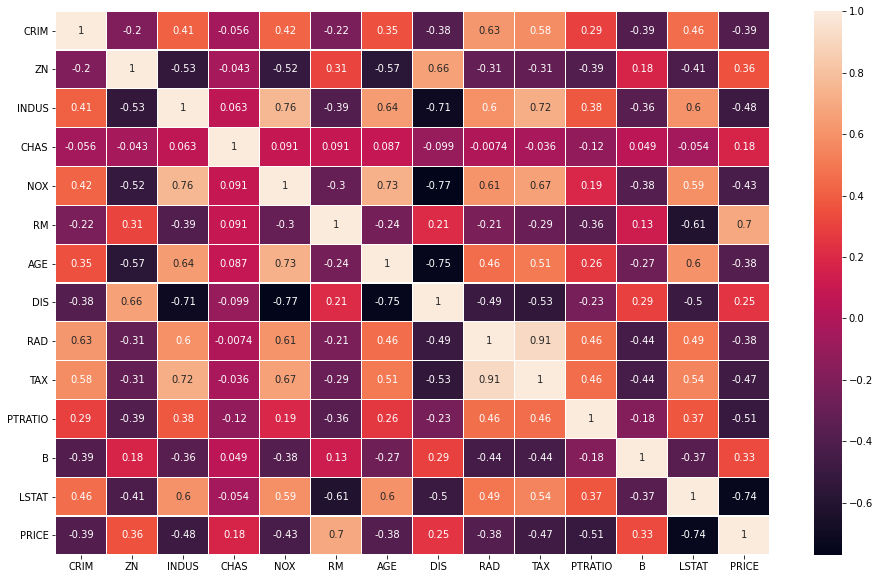

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(origional_df.corr(),annot=True,linewidth=0.1)

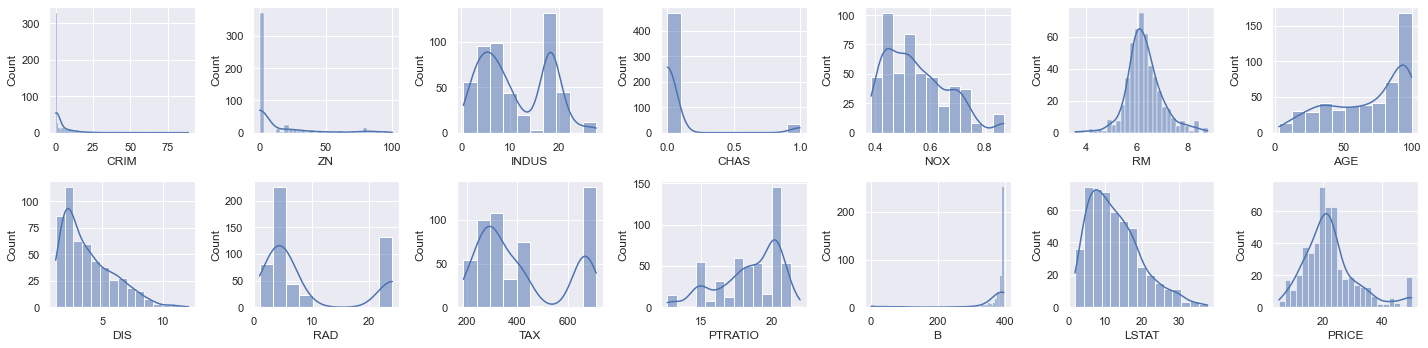

In [19]:
#Checking for distribution
sns.set()
fig,axs=plt.subplots(2,7,figsize=(20,5))
index=0
cols=origional_df.columns
for i in range(2):
    for j in range(7):
        sns.histplot(origional_df[cols[index]],ax=axs[i][j],kde=True)
        index+=1
plt.tight_layout()

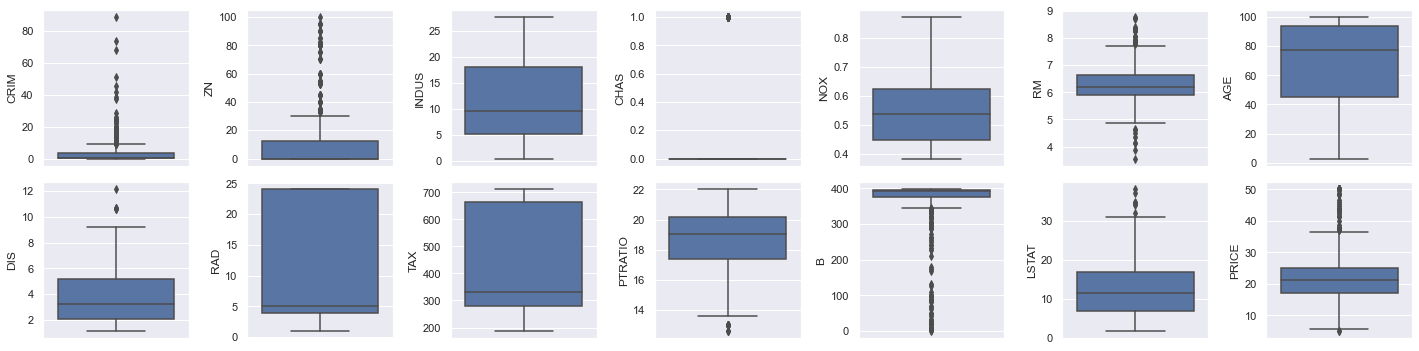

In [20]:
#Checking for Outliers
fig,axs=plt.subplots(2,7,figsize=(20,5))

cols=origional_df.columns
index=0
for i in range(2):
    for j in range(7):
        sns.boxplot(y=cols[index],data=origional_df,ax=axs[i][j])
        index+=1
plt.tight_layout()

In [21]:
#Importing libraries for models
#Using Scaling in order to get minima faster
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet,RidgeCV,LassoCV,ElasticNetCV,LinearRegression

In [22]:
#Applying scaling
#Score after removing the TAX column as it have VIF > 5.

X=origional_df.drop(columns=['PRICE'],axis=1)
y=origional_df['PRICE']

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=X_scaled

vif=pd.DataFrame()

vif['VIF']=[variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif['Features']=X.columns

In [24]:
vif

,VIF,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity.

In [25]:
#Splitting data into test and train

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X_scaled,y,test_size=.2,random_state=3)

In [26]:
#creating simple Linear Model

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
model.score(x_test,y_test)

0.7952617563243854

In [28]:
#saving the scaling
scaler_filename='bostonLR_simple_scaler.pickle'
pickle.dump(scaler,open(scaler_filename,'wb'))

#saving the model
filename='bostonLR_simple.pickle'
pickle.dump(model,open(filename,'wb'))

In [29]:
def adj_r2(model,x,y):
    r2=model.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    
    adjusted_r2=1-(((1-r2)*(n-1))/(n-p-1))
    
    return adjusted_r2

In [30]:
adj_r2(model,x_train,y_train)

0.7147390641566448

In [31]:
#creating L1 regularization model.

l1_cv=LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
l1_cv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [32]:
computed_alpha=l1_cv.alpha_
computed_alpha

0.0003358949413812425

In [33]:
lasso_model=Lasso(computed_alpha)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.0003358949413812425)

In [34]:
lasso_model.score(x_test,y_test)

0.7952657247312903

In [35]:
adj_r2(lasso_model,x_test,y_test)

0.7650208886120491

In [36]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
l2_cv=RidgeCV(alphas=alphas,cv=10,normalize=True)
l2_cv.fit(x_train,y_train)

RidgeCV(alphas=array([2.02502594, 3.70473361, 6.37991176, 7.70938772, 5.21842012,
       6.20056758, 4.70429758, 8.58516147, 5.26133437, 1.7240717 ,
       5.66071074, 7.96787823, 1.25220351, 4.01705233, 3.05011562,
       8.91053097, 1.23728072, 9.59281145, 9.67811515, 8.03582906,
       2.76102714, 1.70103229, 5.81191553, 3.47151093, 4.92554243,
       7.4333194 , 8.93141096, 8.7932336 , 5.40854594, 9.40876997,
       4.7115852 , 7.33541673, 5.2224884 , 5.27872759, 5.26977662,
       0.87222113, 3.68413089, 0.9157069 , 1.79001094, 2.99461967,
       7.89118678, 2.1454619 , 8.52767487, 3.26038166, 6.18476817,
       1.06266364, 2.79841444, 0.22464771, 7.7568559 , 5.50758915]),
        cv=10, normalize=True)

In [37]:
l2_model=Ridge(alpha=l2_cv.alpha_)
l2_model.fit(x_train,y_train)

Ridge(alpha=0.22464770709917925)

In [38]:
l2_model.score(x_test,y_test)

0.7951204204487039

In [39]:
adj_r2(l2_model,x_test,y_test)

0.7648541189240806

In [40]:
elastic_cv=ElasticNetCV(alphas=None,cv=10)
elastic_cv.fit(x_train,y_train)

ElasticNetCV(cv=10)

In [41]:
elastic_cv.alpha_

0.013696114957340386

In [42]:
elastic_cv.l1_ratio_

0.5

In [43]:
elastic_model=ElasticNet(alpha=elastic_cv.alpha_)
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=0.013696114957340386)

In [44]:
elastic_model.score(x_test,y_test)

0.7934576903616217

In [45]:
adj_r2(elastic_model,x_test,y_test)

0.7629457582559522

From the above regularization model it is clearly visible that we are getting best accuracy with **LASSO**.

In [46]:
#Checking with polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly_feat=PolynomialFeatures(degree=2)
X_poly=poly_feat.fit_transform(X_scaled)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.2,random_state=3)

In [48]:
poly_mod=LinearRegression()
poly_mod.fit(x_train,y_train)

LinearRegression()

In [49]:
poly_mod.score(x_test,y_test)

0.8599704424829802

In [50]:
p=poly_mod.predict(poly_feat.transform(scaler.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]])))

In [51]:
p[0]

23.6998291015625

In [52]:
#saving pickel for deploying the model

scaler_name='scaler.pickle'
poly_features='poly_feat.pickle'
poly_model='poly_mod.pickle'

pickle.dump(scaler,open(scaler_name,'wb'))
pickle.dump(poly_feat,open(poly_features,'wb'))
pickle.dump(poly_mod,open(poly_model,'wb'))

In [53]:
f1=pickle.load(open(scaler_name,'rb'))

In [54]:
f1

StandardScaler()

In [3]:
pip install scikit_learn==0.24.1

  Using cached https://files.pythonhosted.org/packages/16/33/e0b09b2810e355b667cd3b28850c36963735a77a431efdb2c2ca1c1c5cea/scikit_learn-0.24.1-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/f7/12/ec3f2e203afa394a149911729357aa48affc59c20e2c1c8297a60f33f133/threadpoolctl-2.1.0-py3-none-any.whl
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
Note: you may need to restart the kernel to use updated packages.
